## Marketing Sales Prediction

Given *data about budgets in a marketing campaign*, let's try to predict the **sales** generated by a given budget allocation.

We will use a gradient boosting regression model to make our predictions.

Data source: https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data

### Getting Started 

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import GradientBoostingRegressor

In [3]:
data = pd.read_csv('Dummy Data HSS.csv')
data

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


### Preprocessing

In [5]:
df = data.copy()

In [7]:
df.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [10]:
# Drop rows with missing target data
missing_target_rows = df[df['Sales'].isna()].index
df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4561,26.0,4.472360,0.717090,Micro,94.685866
4562,71.0,20.610685,6.545573,Nano,249.101915
4563,44.0,19.800072,5.096192,Micro,163.631457
4564,71.0,17.534640,1.940873,Macro,253.610411


In [11]:
df.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            0
dtype: int64

In [12]:
# Fill remaining missing values with column means
for col in ['TV', 'Radio', 'Social Media']:
    df[col] = df[col].fillna(df[col].mean())

In [13]:
df.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [14]:
# Split df into X and y
y = df['Sales']
X = df.drop('Sales', axis=1)

In [15]:
X

,TV,Radio,Social Media,Influencer
0,16.0,6.566231,2.907983,Mega
1,13.0,9.237765,2.409567,Mega
2,41.0,15.886446,2.913410,Mega
3,83.0,30.020028,6.922304,Mega
4,15.0,8.437408,1.405998,Micro
...,...,...,...,...
4561,26.0,4.472360,0.717090,Micro
4562,71.0,20.610685,6.545573,Nano
4563,44.0,19.800072,5.096192,Micro
4564,71.0,17.534640,1.940873,Macro


In [16]:
y

0        54.732757
1        46.677897
2       150.177829
3       298.246340
4        56.594181
           ...    
4561     94.685866
4562    249.101915
4563    163.631457
4564    253.610411
4565    148.202414
Name: Sales, Length: 4566, dtype: float64

In [17]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
X_train

,TV,Radio,Social Media,Influencer
195,34.0,12.660398,3.325184,Mega
1263,99.0,33.899272,7.955181,Macro
172,82.0,23.434787,5.914866,Micro
2354,44.0,14.631639,0.635238,Nano
1669,42.0,13.766518,1.667910,Macro
...,...,...,...,...
2895,75.0,23.482965,3.750274,Micro
2763,74.0,16.777991,2.297886,Macro
905,13.0,4.418318,0.015489,Nano
3980,14.0,1.304560,2.523884,Mega


In [18]:
y_train

195     117.114141
1263    352.899957
172     288.020745
2354    156.863269
1669    149.334202
           ...    
2895    263.375045
2763    261.217139
905      44.870534
3980     49.646021
235     157.490072
Name: Sales, Length: 3196, dtype: float64

### Training

In [21]:
OneHotEncoder?

Init signature:
OneHotEncoder(
    *,
    categories='auto',
    drop=None,
    sparse_output=True,
    dtype=<class 'numpy.float64'>,
    handle_unknown='error',
    min_frequency=None,
    max_categories=None,
    feature_name_combiner='concat',
)
Docstring:     
Encode categorical features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or
strings, denoting the values taken on by categorical (discrete) features.
The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
encoding scheme. This creates a binary column for each category and
returns a sparse matrix or dense array (depending on the ``sparse_output``
parameter).

By default, the encoder derives the categories based on the unique values
in each feature. Alternatively, you can also specify the `categories`
manually.

This encoding is needed for feeding categorical data to many scikit-learn
estimators, notably linear models and SVMs with the standard kernels.

Note: a o

In [22]:
nominal_transformer = Pipeline(steps=[
     ('onehot', OneHotEncoder(sparse_output=False))   
])

preprocessor = ColumnTransformer(transformers=[
    ('nominal', nominal_transformer, ['Influencer'])
], remainder='passthrough')

In [23]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

In [24]:
model.fit(X_train, y_train)

/home/john/miniconda3/envs/dsenv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Influencer'])])),
                ('regressor', GradientBoostingRegressor())])

### Results

In [25]:
y_pred = model.predict(X_test)
y_pred

array([ 92.03833557,  93.05698904,  79.04823134, ..., 342.8801233 ,
       153.29348362, 120.24411602])

In [27]:
np.array(y_test)

array([ 96.75762967,  90.03770827,  80.42495159, ..., 338.7906266 ,
       153.5383231 , 119.2920553 ])

In [31]:
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
rmse

6.329273870640008

In [32]:
y_test.describe()

count    1370.000000
mean      194.348001
std        92.698049
min        31.402262
25%       112.821691
50%       193.754820
75%       272.015837
max       358.420739
Name: Sales, dtype: float64

In [34]:
np.sum((y_test -y_test.mean())**2)

11763718.746109352

In [39]:
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test -y_test.mean())**2))

In [41]:
print("RMSE: {:.2f}".format(rmse))
print("R^2: {:.4f}".format(r2))

RMSE: 6.33
R^2: 0.9953


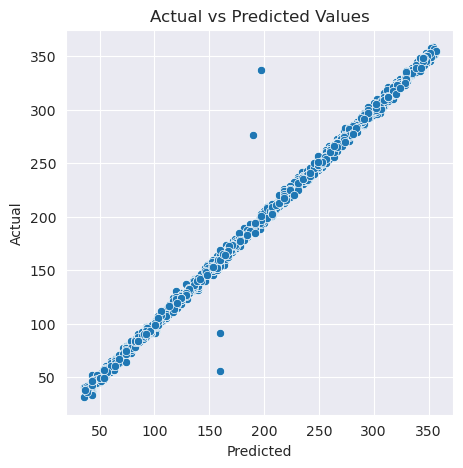

In [43]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs Predicted Values")
plt.show()